# xSDR: Speaker-Independent Spoken Digit Recognition
This is our solution for the final graded project for the WS22/23 course "_Neural Networks: Theory and Implementation_" at Saarland University.
<br/>
Authors: _Christian Singer, Mhd Jawad Al Rahwanji_
`{chsi00002, mhal00002}@stud.uni-saarland.de`
<br/>
<img src="xSDR.png" height=333>

##### Before we start, we'd like to point out a couple of things:

-- An **Introduction** to the project can be found in `README.md`

-- Some preliminary **Data Exploration** can be found in `DataExploration.ipynb`

### Imports

In [1]:
# add this to ignore warnings from Librosa
import warnings
import os

warnings.filterwarnings('ignore')

In [2]:
base = os.getcwd()

### Task I

In [3]:
# I.1

from model_baseline.data_loading import downsample_spectrogram

downsample_spectrogram

<function model_baseline.data_loading.downsample_spectrogram(spectrogram, num_frames)>

In [4]:
# I.2

from model_baseline.data_loading import create_features

create_features

<function model_baseline.data_loading.create_features(split, num_mels=13, num_frames=10, lazy_mode=True)>

In [5]:
# I.3

from model_baseline.linear_model import classifier

classifier

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(loss='modified_huber', n_jobs=-1,
                               penalty='elasticnet'))])

In [6]:
# I.4

os.chdir(base + '/model_baseline')
%run 'linear_model.py'
os.chdir(base)

----------------------------------TRAIN-SET----------------------------------------
Confusion matrix:
[[195   1   1   0   2   0   0   0   0   1]
 [  5 187   0   0   2   3   0   1   0   2]
 [  7   4 183   4   0   0   1   0   0   1]
 [ 15   0  14 160   0   2   0   5   1   3]
 [ 14   6   0   0 178   0   1   1   0   0]
 [  0   7   0   0   0 189   0   0   0   4]
 [  8   0   0   4   0   2 167   5  14   0]
 [ 15  21   0   0   2   3   5 151   0   3]
 [  3   1   0   1   0   2  20   4 169   0]
 [ 11   4   0   0   0   2   0   1   0 182]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.97      0.82       200
           1       0.81      0.94      0.87       200
           2       0.92      0.92      0.92       200
           3       0.95      0.80      0.87       200
           4       0.97      0.89      0.93       200
           5       0.93      0.94      0.94       200
           6       0.86      0.83      0.85       200
          

### Task II

In [7]:
# II.1

from model_neural.transformer_model import TransformerModel
from model_neural.conv1d_model import Conv1dModel, Conv1dMelModel

print(Conv1dModel) # For exploration purposes, a raw input Conv1d was developed
print(Conv1dMelModel)

print(TransformerModel)

<class 'model_neural.conv1d_model.Conv1dModel'>
<class 'model_neural.conv1d_model.Conv1dMelModel'>
<class 'model_neural.transformer_model.TransformerModel'>


In [8]:
# II.2

os.chdir(base + '/model_neural')
%run 'classification_report.py'
os.chdir(base)

Using: 'cpu' as device for report.
------------------- Conv1dMelModel report -------------------

Confusion matrix of train-set:
 tensor([[191,   0,   5,   0,   0,   0,   4,   0,   0,   0],
        [  0, 199,   1,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0, 199,   1,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 198,   0,   0,   2,   0,   0,   0],
        [  0,   0,   2,   0, 196,   0,   2,   0,   0,   0],
        [  0,   0,   0,   0,   0, 197,   3,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 200,   0,   0,   0],
        [  0,   0,   0,   1,   0,   0,   0, 199,   0,   0],
        [  0,   0,   0,   0,   0,   0,   1,   0, 199,   0],
        [  0,   1,   0,   5,   0,   0,   1,   0,   0, 193]])

Classification report: train-set:
 class   precision   recall   f1-score
     0      1.00       0.95       0.98       
     1      1.00       1.00       1.00       
     2      0.96       1.00       0.98       
     3      0.97       0.99       0.98       
     4     

Using: 'cpu' as device for report.
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.003s...
[t-SNE] Computed neighbors for 500 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 12.156198
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.724998
[t-SNE] KL divergence after 300 iterations: 0.217523


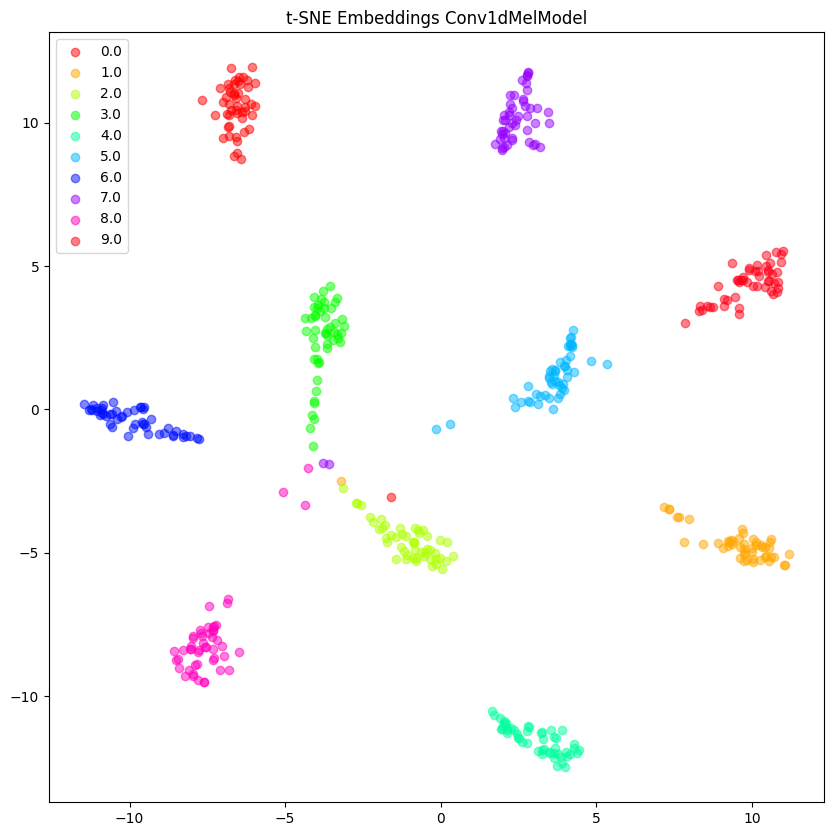

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.000s...
[t-SNE] Computed neighbors for 500 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 2.708085
[t-SNE] KL divergence after 250 iterations with early exaggeration: 39.260372
[t-SNE] KL divergence after 300 iterations: 0.233522


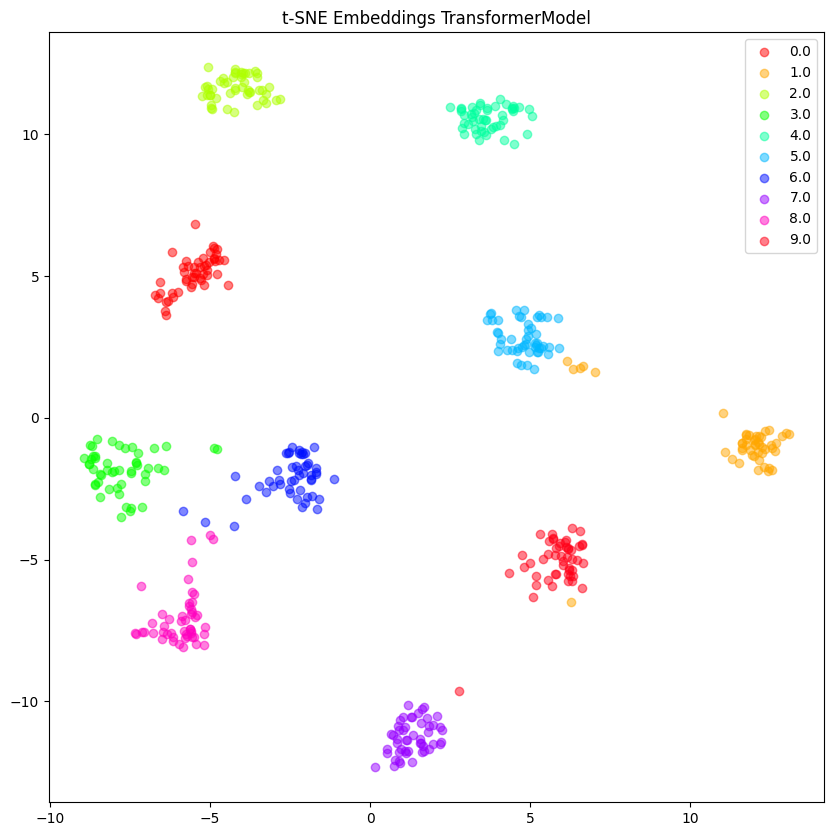

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 30.252764
[t-SNE] KL divergence after 300 iterations: -0.722199


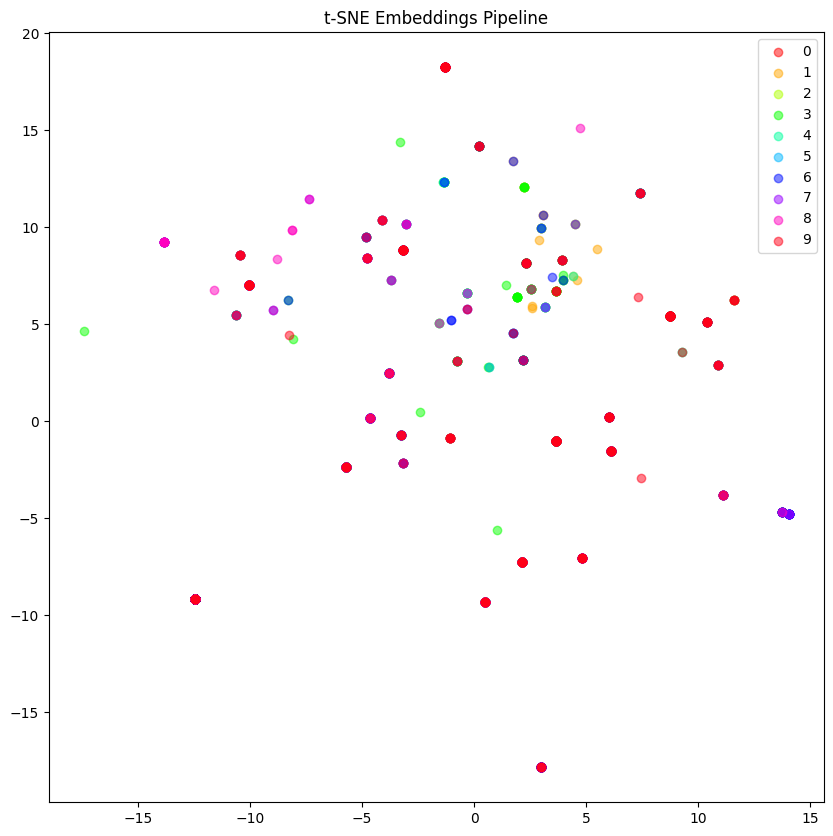

In [9]:
# II.3

os.chdir(base + "/comparative_analysis")
%run 'tsne_model_embeddings.py'
os.chdir(base)

In [10]:
# II.4

os.chdir(base + "/comparative_analysis")
%run 'statistical_significance_test.py'
os.chdir(base)

When p < 0.5, 2nd model outperforms 1st with [p]
When p > 0.5, 1st model outperforms 2nd with [1 - p]

Sampling 100 times...
p-value of Conv1d x Baseline: 1.0
Sampling 100 times...
p-value of Transformer x Baseline: 1.0
Sampling 100 times...
p-value of Conv1d x Transformer: 0.87


### Task III

In [11]:
# III.1

"""
Answers to sub-questions:

Here we ONLY evaluate the models on the 3 splits. The models have been previously trained on a single speaker (george) and loaded for evaluation.

- During training we've noticed that the training error decreases while the validation loss remains constant and high.

- This means that the models overfit to the single speaker and were unable to generalize and perform well on the other speakers. Since the single speaker set is so small and unvaried, the performance was even worse than that of the same untuned model trained on the complete training split which also overfit.
"""
os.chdir(base + '/model_neural')
%run 'single_speaker_classification_report.py'
os.chdir(base)

Using: 'cpu' as device for report.
------------------- Conv1dMelModel report -------------------

Confusion matrix of train-set:
 tensor([[ 56,  37,  48,   1,   9,   0,   0,  16,  33,   0],
        [  0,  66, 121,   3,   8,   0,   0,   0,   2,   0],
        [ 13,   0, 109,  41,   0,   1,   0,   8,  28,   0],
        [  0,   0,  32, 137,   0,   0,   0,   0,  29,   2],
        [  0,  45,  89,   0,  64,   0,   0,   0,   2,   0],
        [  0,  21,  61,   5,  63,  49,   0,   0,   1,   0],
        [  0,   0,   1,  27,   0,  22,  51,  31,  68,   0],
        [  1,   6,  57,  39,  30,   1,   0,  54,  12,   0],
        [  0,   0,  16,  19,   0,   0,   0,   0, 165,   0],
        [  1,  39,  68,  10,  22,   3,   0,   0,   1,  56]])

Classification report: train-set:
 class   precision   recall   f1-score
     0      0.79       0.28       0.41       
     1      0.31       0.33       0.32       
     2      0.18       0.55       0.27       
     3      0.49       0.69       0.57       
     4     

In [12]:
# III.2

"""
CM analysis:

Here our Conv1d model was trained on a single speaker, once with SpecAugment (frequency masking) and once with WavAugment (contrast transform).

- The classification reports, again evaluated on the 3 splits, are thus. The performance on validation sets improved two fold. While single speaker set was also overfit since it contains the original single speaker set that it was trained on.

- Two fold, in the sense that only about 1 digit was recognized before. Now about 2 or so digits are being recognized. As can be seen from inspecting the validation/test set CMs.
"""
os.chdir(base + '/model_neural')
%run 'data_augmentation_classification_report.py'
os.chdir(base)

Using: 'cpu' as device for report.
------------------- Conv1dMelModel report -------------------

Confusion matrix of train-set:
 tensor([[117,   0,  29,   6,  23,   0,   2,   5,  18,   0],
        [  0,  88,  60,   0,  51,   1,   0,   0,   0,   0],
        [ 24,   0, 126,  29,   0,   0,  11,   2,   8,   0],
        [ 18,   3,  67,  96,   2,   0,   8,   4,   2,   0],
        [  0,   1,  91,   1, 107,   0,   0,   0,   0,   0],
        [  0,  73,  24,   0,  33,  67,   0,   0,   1,   2],
        [  0,   3,  35,  16,   0,   0,  68,  49,  29,   0],
        [  0,  74,  30,   3,  30,   0,   6,  53,   4,   0],
        [  0,   0,  60,   5,   1,   1,  13,   0, 120,   0],
        [  0, 127,  11,   0,  21,   0,   0,   0,   1,  40]])

Classification report: train-set:
 class   precision   recall   f1-score
     0      0.74       0.58       0.65       
     1      0.24       0.44       0.31       
     2      0.24       0.63       0.34       
     3      0.62       0.48       0.54       
     4     

In [13]:
# III.3

"""
Answers to sub-questions:

- TODO: Fill with answer to : "Does this model improve over the model without contrastive learning?"

- Discuss your observations.
"""

os.chdir(base + '/model_neural')
%run 'contrastive_learning_classification_report.py'
os.chdir(base)

Using: 'cpu' as device for report.
------------------- Conv1dMelModel report -------------------
